# <font color='red'>Housing Price Prediction</font>

# 1. Problem Statement

The dataset contains the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc.

The Datset consists of 13 features & 545 samples.

The dataset was collected from kaggle website.
https://www.kaggle.com/datasets/yasserh/housing-prices-dataset 

# 2. Data Exploration

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [2]:
df = pd.read_csv('housing.csv')

target = 'price'
features = [i for i in df.columns if i not in [target]]

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Shape of the dataset

In [4]:
df.shape

(545, 13)

The Datset consists of 13 features & 545 samples.

### Summary of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Dividing features into numerical and categorical

In [7]:
# addimng feature sto categorical having object data type or having fewer than 10 unique values
categorical = [i for i in df[features] if df[i].dtype == 'O' or df[i].nunique() < 10]

#adding features to numerical that are not in categorical
numerical = [i for i in df[features] if i not in categorical]


In [8]:
categorical

['bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [9]:
numerical

['area']

In [11]:
df.nunique().sort_values()

mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
prefarea              2
furnishingstatus      3
bathrooms             4
stories               4
parking               4
bedrooms              6
price               219
area                284
dtype: int64

# 3. Exploratory Data Analysis (EDA)


### Analyse the distribution of the target variable

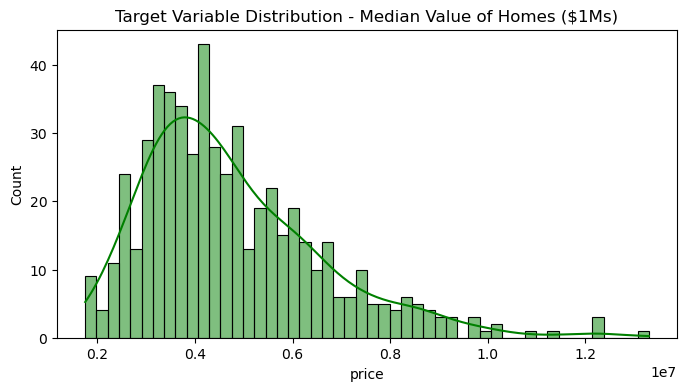

In [12]:
plt.figure(figsize=[8,4])
sns.histplot(df[target], color='g', bins=50, kde = True)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

The Target Variable seems to be be normally distributed, averaging around 20 units.

### Visualising all  features

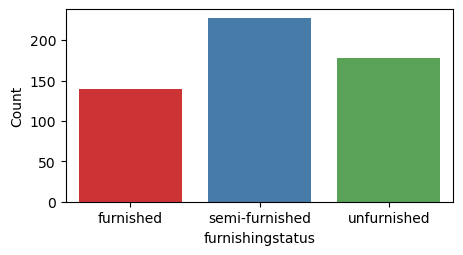

In [13]:
plt.figure(figsize=(5, 2.5)) 

sns.countplot(data=df, x="furnishingstatus",palette="Set1")
plt.xlabel("furnishingstatus")
plt.ylabel("Count")
plt.show()

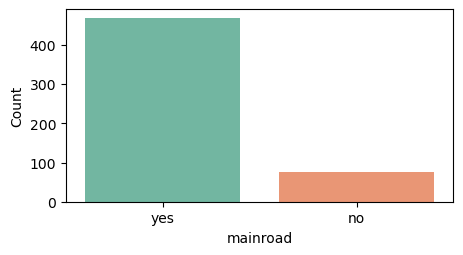

In [14]:
plt.figure(figsize=(5, 2.5)) 

sns.countplot(data=df, x="mainroad",palette="Set2")
plt.xlabel("mainroad")
plt.ylabel("Count")
plt.show()

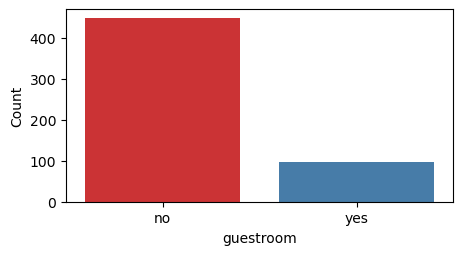

In [15]:
plt.figure(figsize=(5, 2.5)) 

sns.countplot(data=df, x="guestroom",palette="Set1")
plt.xlabel("guestroom")
plt.ylabel("Count")
plt.show()

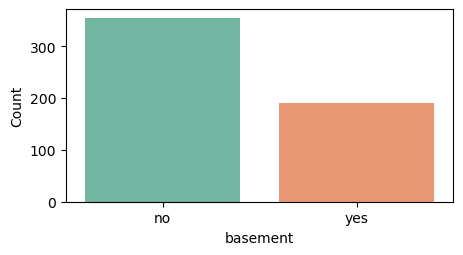

In [16]:
plt.figure(figsize=(5, 2.5)) 

sns.countplot(data=df, x="basement",palette="Set2")
plt.xlabel("basement")
plt.ylabel("Count")
plt.show()

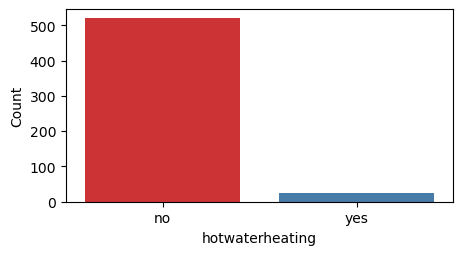

In [17]:
plt.figure(figsize=(5, 2.5)) 

sns.countplot(data=df, x="hotwaterheating",palette="Set1")
plt.xlabel("hotwaterheating")
plt.ylabel("Count")
plt.show()

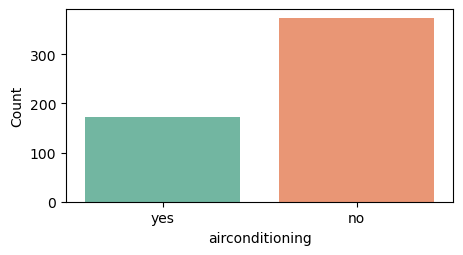

In [18]:
plt.figure(figsize=(5, 2.5)) 

sns.countplot(data=df, x="airconditioning",palette="Set2")
plt.xlabel("airconditioning")
plt.ylabel("Count")
plt.show()

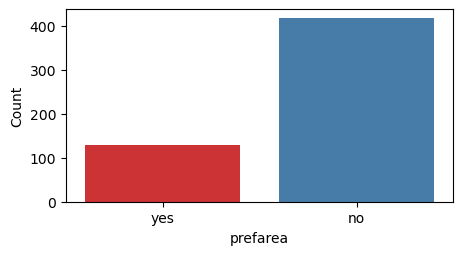

In [19]:
plt.figure(figsize=(5, 2.5)) 

sns.countplot(data=df, x="prefarea",palette="Set1")
plt.xlabel("prefarea")
plt.ylabel("Count")
plt.show()

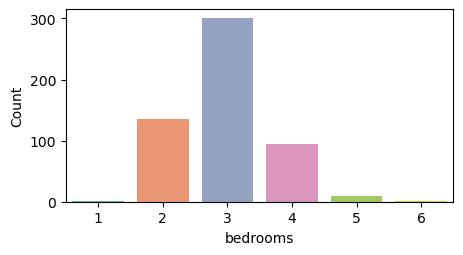

In [20]:
plt.figure(figsize=(5, 2.5)) 

sns.countplot(data=df, x="bedrooms",palette="Set2")
plt.xlabel("bedrooms")
plt.ylabel("Count")
plt.show()

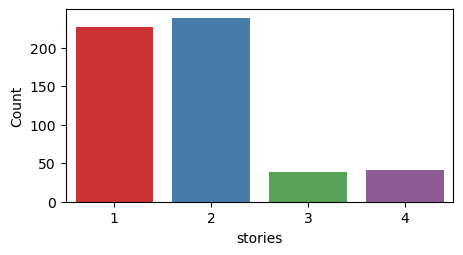

In [21]:
plt.figure(figsize=(5, 2.5)) 

sns.countplot(data=df, x="stories",palette="Set1")
plt.xlabel("stories")
plt.ylabel("Count")
plt.show()

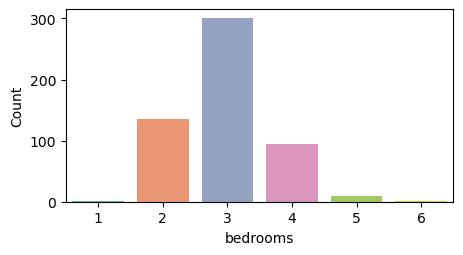

In [22]:
plt.figure(figsize=(5, 2.5)) 

sns.countplot(data=df, x="bedrooms",palette="Set2")
plt.xlabel("bedrooms")
plt.ylabel("Count")
plt.show()

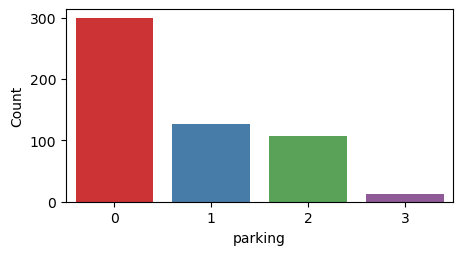

In [23]:
plt.figure(figsize=(5, 2.5)) 

sns.countplot(data=df, x="parking",palette="Set1")
plt.xlabel("parking")
plt.ylabel("Count")
plt.show()

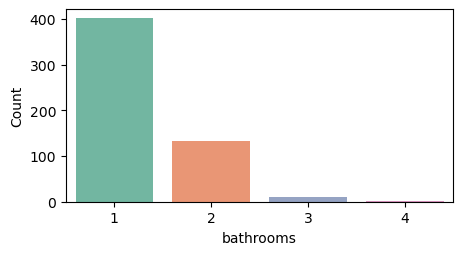

In [24]:
plt.figure(figsize=(5, 2.5)) 

sns.countplot(data=df, x="bathrooms",palette="Set2")
plt.xlabel("bathrooms")
plt.ylabel("Count")
plt.show()

### Visualising the numeric features 

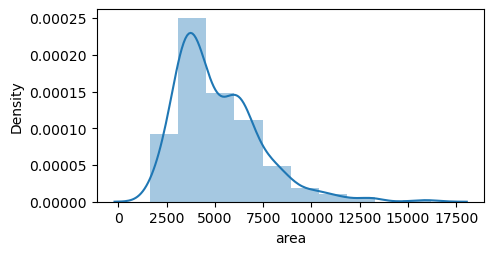

In [25]:
plt.figure(figsize=[5,2.5])
sns.distplot(df['area'], bins=10)
plt.xlabel("area")
plt.show()

### Relationship between all the features

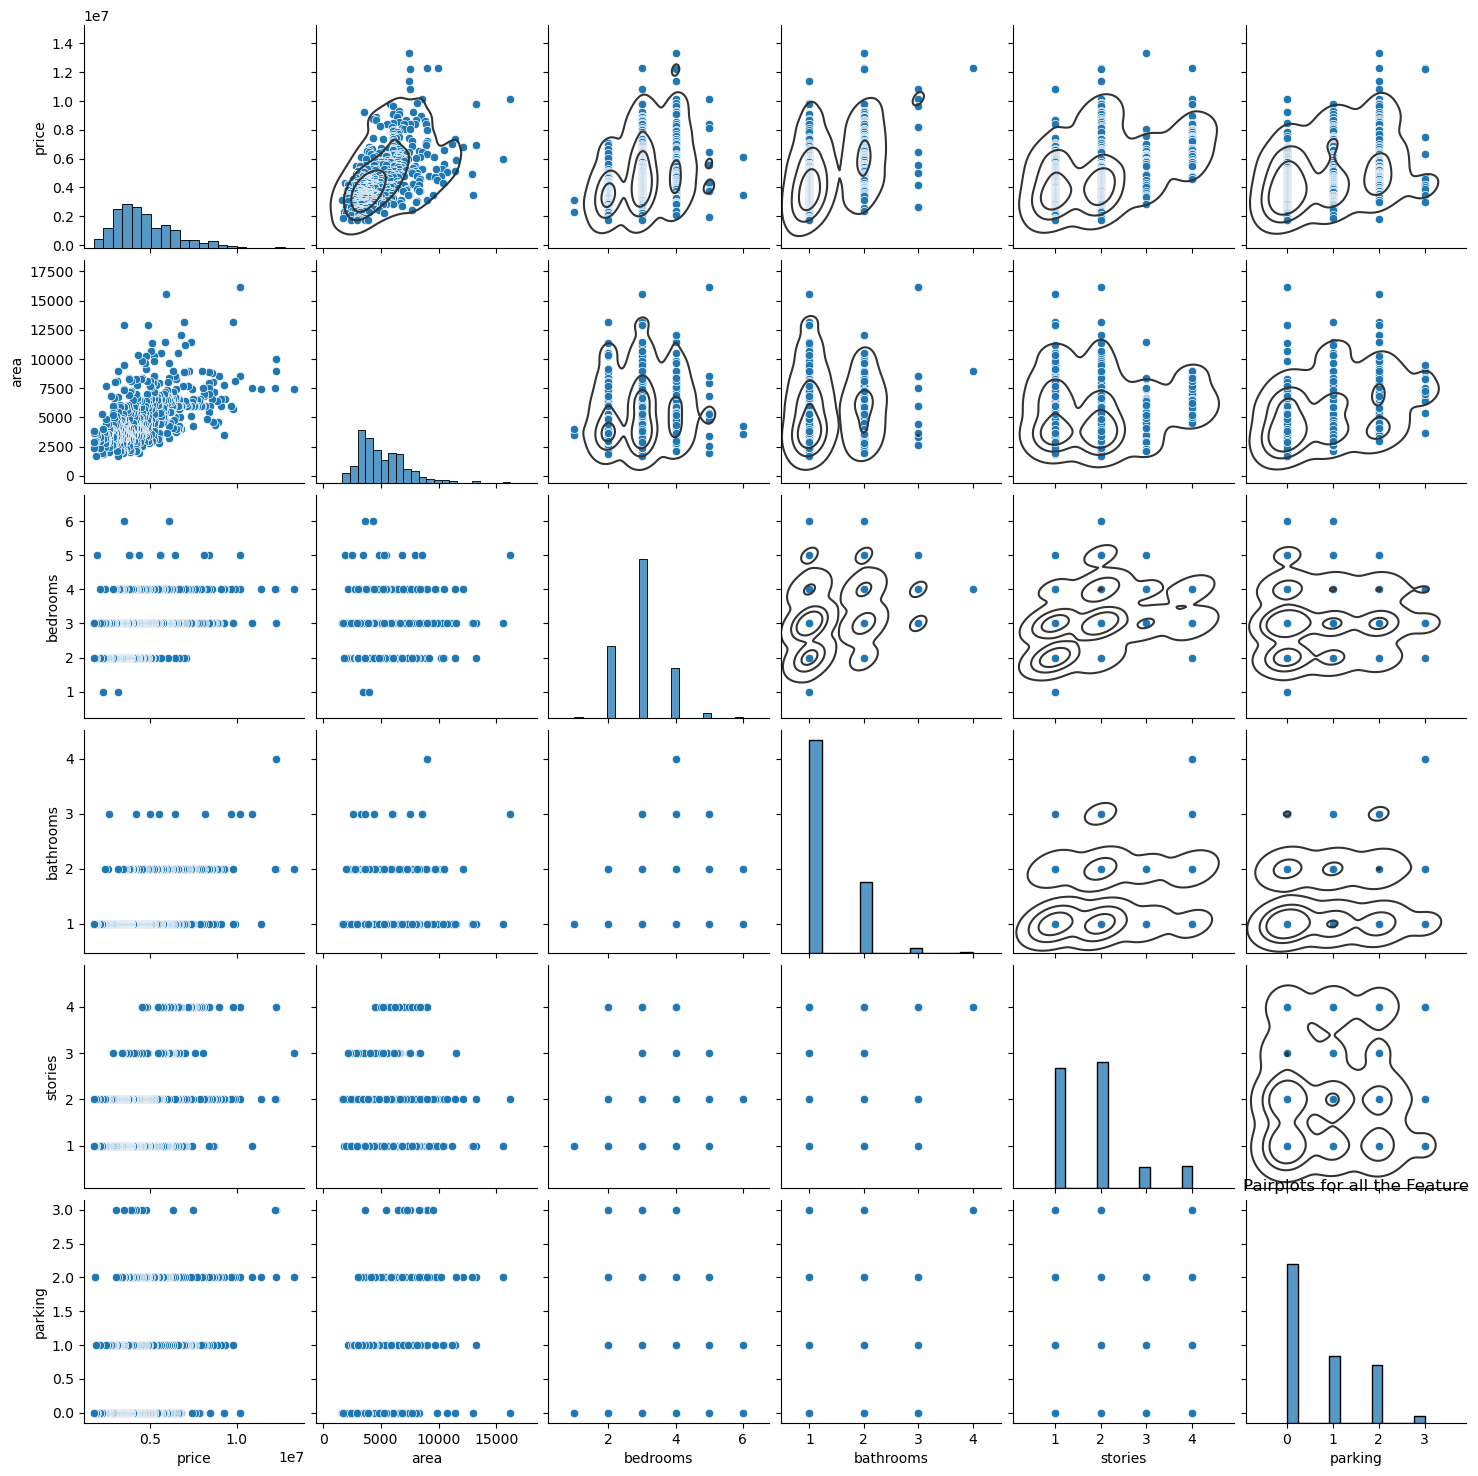

In [26]:
g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot,levels=4, color=".2" )
plt.show()

 Some features have linear relationship between them.

# 4. Data Preprocessing

In [27]:
# remove duplicate rows if any
df.duplicated().sum()

0

The dataset doesn't have any duplicates

In [28]:
# check for empty elements
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

The datset doesn't have any inconsistant values

### Converting categorical Columns to Numeric

In [29]:
df1 = df

In [30]:
df1 = df1.drop(columns=['mainroad'])
df1 = df1.drop(columns=['guestroom'])
df1 = df1.drop(columns=['basement'])
df1 = df1.drop(columns=['hotwaterheating'])
df1 = df1.drop(columns=['airconditioning'])
df1 = df1.drop(columns=['prefarea'])
df1 = df1.drop(columns=['furnishingstatus'])

df1 = df1.drop(columns=['bedrooms'])
df1 = df1.drop(columns=['bathrooms'])
df1 = df1.drop(columns=['stories'])
df1 = df1.drop(columns=['parking'])


mainroad = pd.get_dummies(df['mainroad'], prefix='mainroad',drop_first=True).astype(int)
guestroom = pd.get_dummies(df['guestroom'], prefix='guestroom',drop_first=True).astype(int)
basement = pd.get_dummies(df['basement'], prefix='basement',drop_first=True).astype(int)
hotwaterheating = pd.get_dummies(df['hotwaterheating'], prefix='hotwaterheating',drop_first=True).astype(int)
airconditioning = pd.get_dummies(df['airconditioning'], prefix='airconditioning',drop_first=True).astype(int)
prefarea = pd.get_dummies(df['prefarea'], prefix='prefarea',drop_first=True).astype(int)
furnishingstatus = pd.get_dummies(df['furnishingstatus'], prefix='furnishingstatus',drop_first=True).astype(int)

bedrooms = pd.get_dummies(df['bedrooms'], prefix='bedrooms',drop_first=True).astype(int)
bathrooms = pd.get_dummies(df['bathrooms'], prefix='bathrooms',drop_first=True).astype(int)
stories = pd.get_dummies(df['stories'], prefix='stories',drop_first=True).astype(int)
parking = pd.get_dummies(df['parking'], prefix='parking',drop_first=True).astype(int)


df1 = pd.concat([df1, mainroad], axis=1)
df1 = pd.concat([df1, guestroom], axis=1)
df1 = pd.concat([df1, basement], axis=1)
df1 = pd.concat([df1, hotwaterheating], axis=1)
df1 = pd.concat([df1, airconditioning], axis=1)
df1 = pd.concat([df1, prefarea], axis=1)
df1 = pd.concat([df1, furnishingstatus], axis=1)

df1 = pd.concat([df1, bedrooms], axis=1)
df1 = pd.concat([df1, bathrooms], axis=1)
df1 = pd.concat([df1, stories], axis=1)
df1 = pd.concat([df1, parking], axis=1)

df1.head()

,price,area,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,...,bedrooms_6,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3
0,13300000,7420,1,0,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,12250000,8960,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,12250000,9960,1,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
3,12215000,7500,1,0,1,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,11410000,7420,1,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [31]:
df1.columns

Index(['price', 'area', 'mainroad_yes', 'guestroom_yes', 'basement_yes',
       'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished',
       'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6',
       'bathrooms_2', 'bathrooms_3', 'bathrooms_4', 'stories_2', 'stories_3',
       'stories_4', 'parking_1', 'parking_2', 'parking_3'],
      dtype='object')

### Checking for correlation

                                         Correlation Matrix                                         


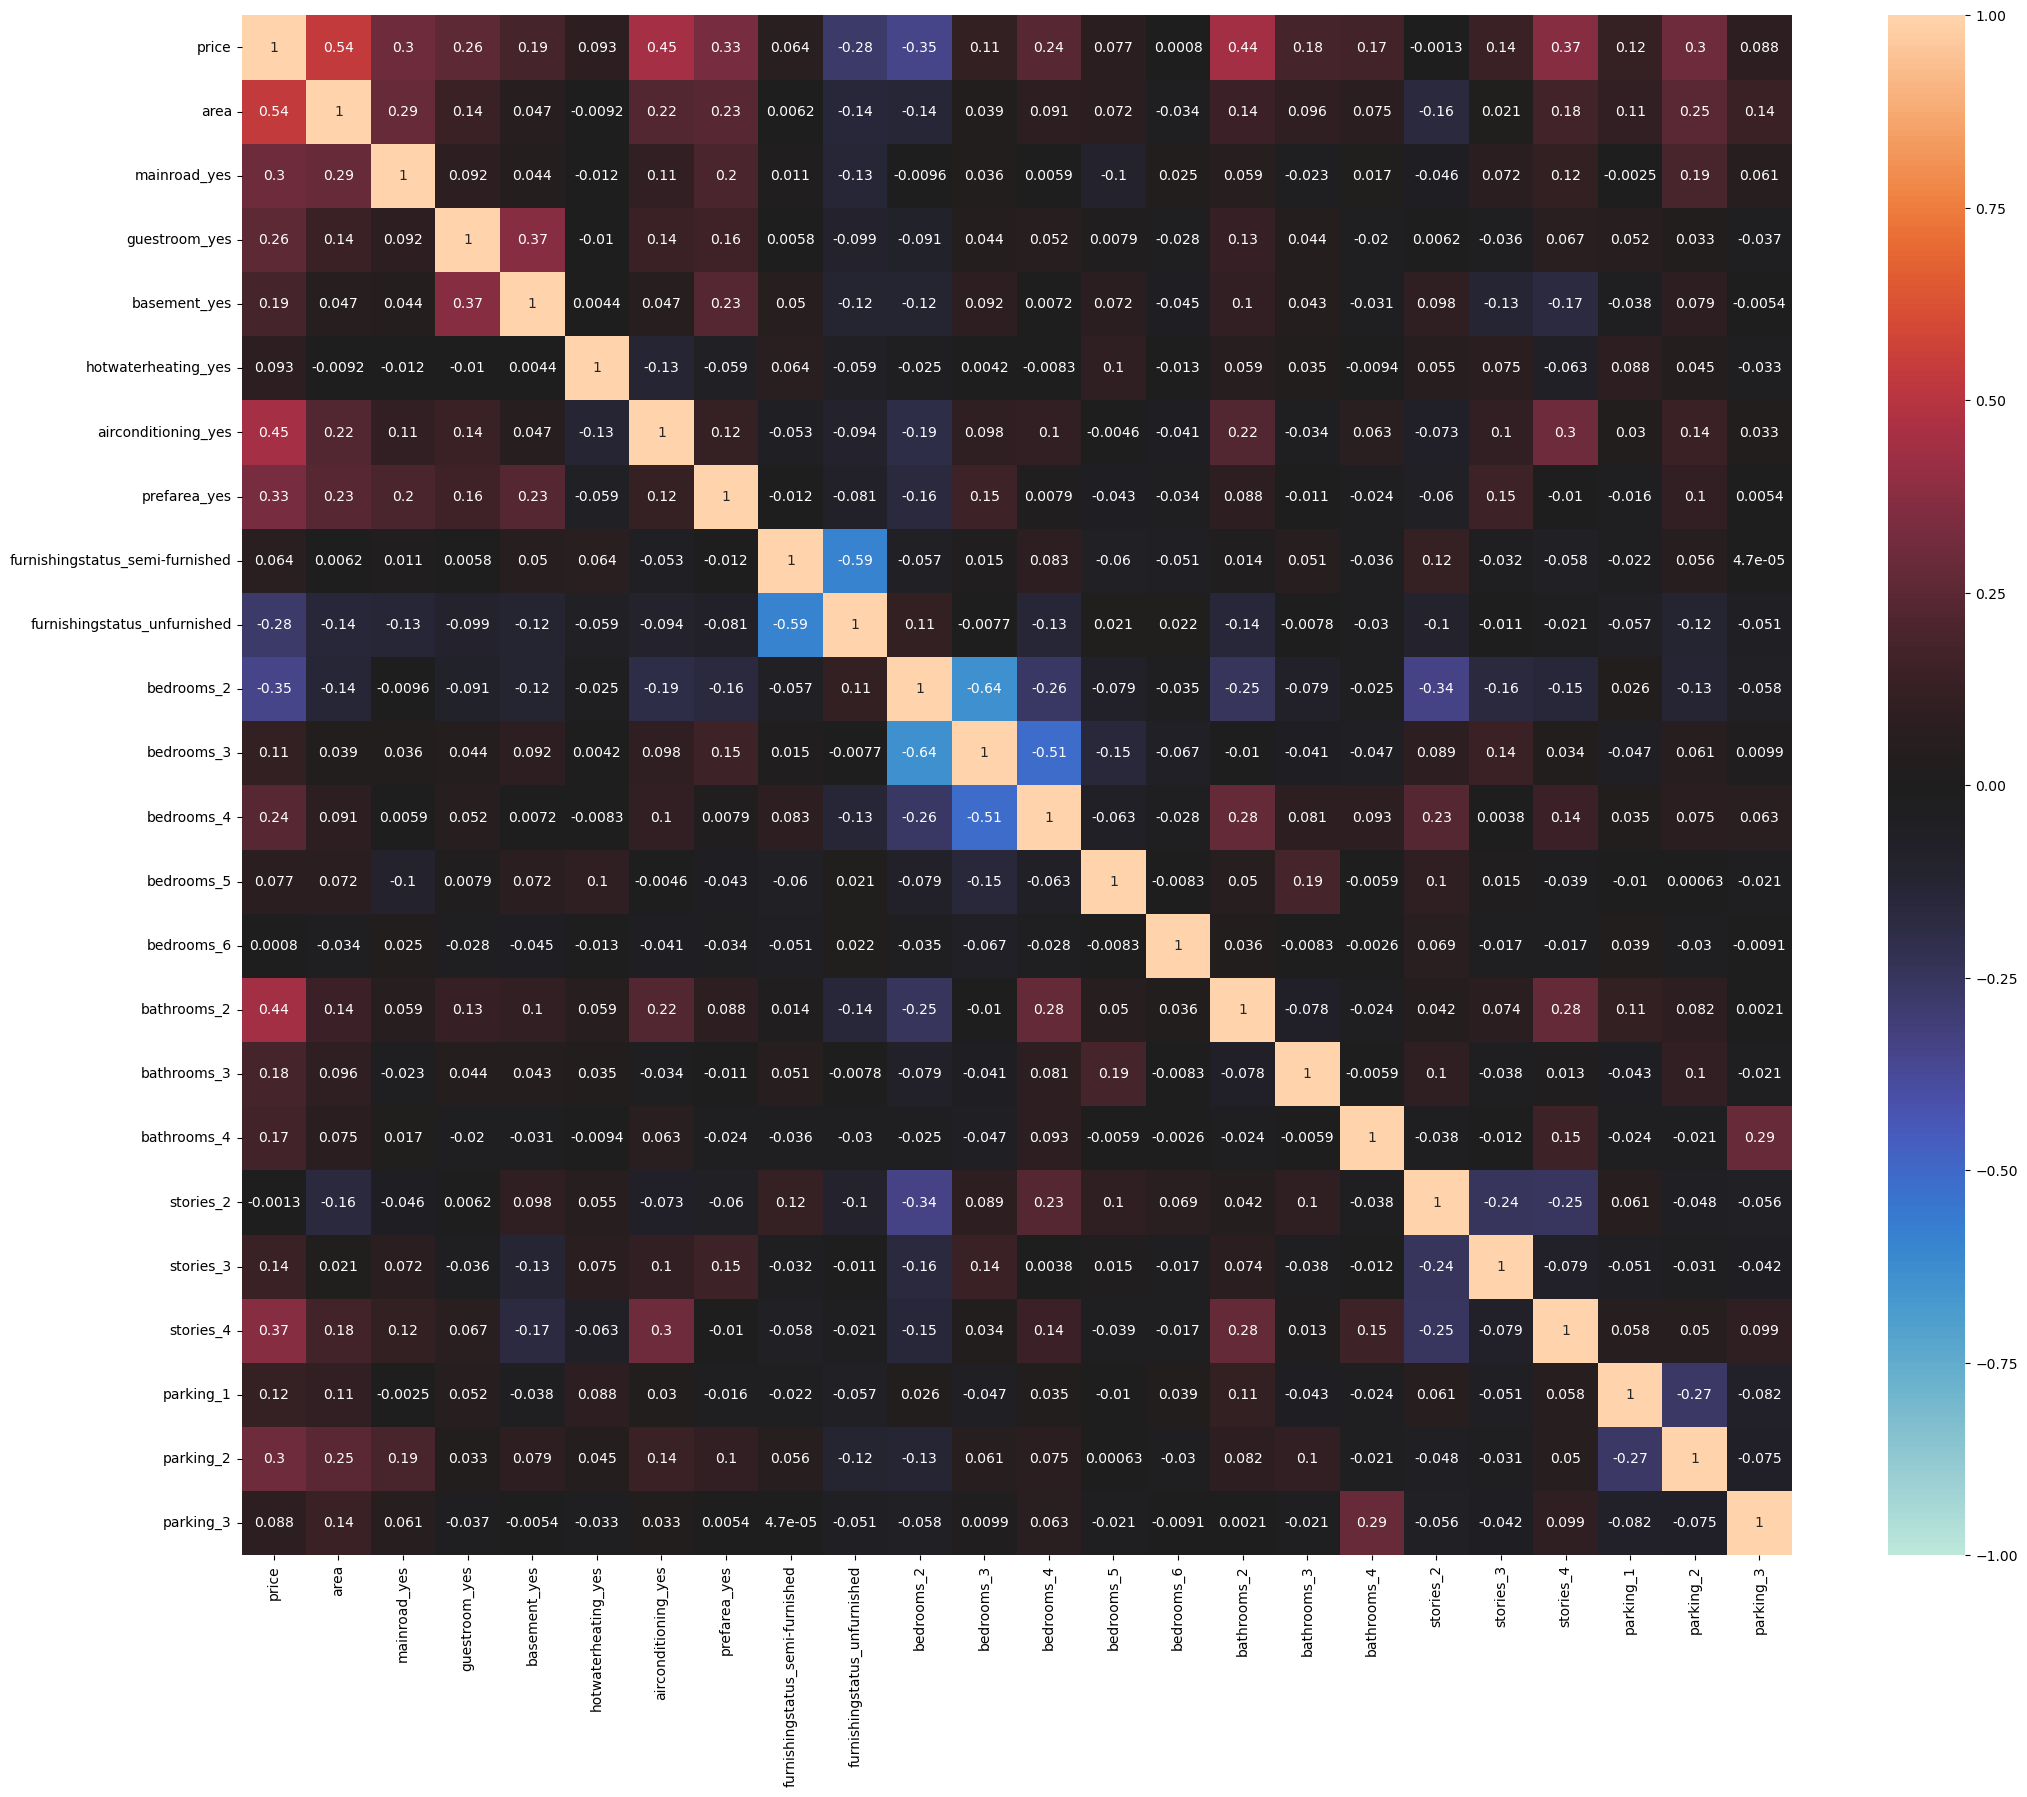

In [32]:
print('Correlation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(df1.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

# 5. Data Manipulation

### Splitting the data intro training & testing sets

In [33]:
X = df1.drop([target],axis=1)
Y = df1[target]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
X_train.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,
      '\nTraining set  ---> ',X_train.shape,Y_train.shape,
      '\nTesting set   ---> ', X_test.shape,'', Y_test.shape)

Original set  --->  (545, 23) (545,) 
Training set  --->  (436, 23) (436,) 
Testing set   --->  (109, 23)  (109,)


### Feature Scaling (Standardization)

In [34]:
std = StandardScaler()

print('Standardardization on Training set'.center(120))
X_train_std = std.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std, columns=X.columns)
display(X_train_std.describe())

print('\n','Standardardization on Testing set'.center(120))
X_test_std = std.transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns=X.columns)
display(X_test_std.describe())

                                           Standardardization on Training set                                           


,area,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,bedrooms_2,...,bedrooms_6,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3
count,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,...,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02
mean,6.416885e-17,-3.340855e-16,-6.213175e-17,1.425975e-17,-5.729362e-18,4.430707e-17,-1.303748e-16,-5.245549e-17,-5.449260e-17,-3.259370e-17,...,9.440715e-17,-4.252460e-17,-2.393600e-17,-7.966996e-17,-9.930894e-17,-3.382870e-16,1.764643e-16,6.773379e-17,-7.486366e-17,-2.955078e-16
std,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,...,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00
min,-1.540198e+00,-2.503331e+00,-4.558028e-01,-7.389853e-01,-2.413554e-01,-6.553687e-01,-5.490834e-01,-8.385255e-01,-6.986091e-01,-5.808815e-01,...,-6.788442e-02,-5.808815e-01,-1.277381e-01,-4.794633e-02,-8.585172e-01,-2.954349e-01,-2.908214e-01,-5.844129e-01,-5.064426e-01,-1.532129e-01
25%,-7.389912e-01,3.994677e-01,-4.558028e-01,-7.389853e-01,-2.413554e-01,-6.553687e-01,-5.490834e-01,-8.385255e-01,-6.986091e-01,-5.808815e-01,...,-6.788442e-02,-5.808815e-01,-1.277381e-01,-4.794633e-02,-8.585172e-01,-2.954349e-01,-2.908214e-01,-5.844129e-01,-5.064426e-01,-1.532129e-01
50%,-2.933591e-01,3.994677e-01,-4.558028e-01,-7.389853e-01,-2.413554e-01,-6.553687e-01,-5.490834e-01,-8.385255e-01,-6.986091e-01,-5.808815e-01,...,-6.788442e-02,-5.808815e-01,-1.277381e-01,-4.794633e-02,-8.585172e-01,-2.954349e-01,-2.908214e-01,-5.844129e-01,-5.064426e-01,-1.532129e-01
75%,5.932510e-01,3.994677e-01,-4.558028e-01,1.353207e+00,-2.413554e-01,1.525859e+00,-5.490834e-01,1.192570e+00,1.431416e+00,1.721522e+00,...,-6.788442e-02,1.721522e+00,-1.277381e-01,-4.794633e-02,1.164799e+00,-2.954349e-01,-2.908214e-01,1.711119e+00,-5.064426e-01,-1.532129e-01
max,5.144981e+00,3.994677e-01,2.193931e+00,1.353207e+00,4.143268e+00,1.525859e+00,1.821217e+00,1.192570e+00,1.431416e+00,1.721522e+00,...,1.473092e+01,1.721522e+00,7.828519e+00,2.085665e+01,1.164799e+00,3.384840e+00,3.438536e+00,1.711119e+00,1.974557e+00,6.526868e+00



                                            Standardardization on Testing set                                            


,area,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,bedrooms_2,...,bedrooms_6,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,...,1.090000e+02,109.000000,109.000000,1.090000e+02,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,0.012148,-0.053262,0.079006,-0.028792,-0.201129,0.165093,0.038055,0.037268,-0.014656,-0.031684,...,-6.788442e-02,-0.095053,0.091241,-4.794633e-02,0.125297,-0.160379,-0.051321,-0.268514,-0.073975,-0.030643
std,1.049393,1.058060,1.068435,0.995276,0.419971,1.061505,1.027938,1.010532,0.999101,0.985784,...,6.970944e-17,0.943777,1.307667,6.273850e-17,1.015946,0.695152,0.918455,0.794452,0.945583,0.900665
min,-1.626765,-2.503331,-0.455803,-0.738985,-0.241355,-0.655369,-0.549083,-0.838525,-0.698609,-0.580881,...,-6.788442e-02,-0.580881,-0.127738,-4.794633e-02,-0.858517,-0.295435,-0.290821,-0.584413,-0.506443,-0.153213
25%,-0.705249,0.399468,-0.455803,-0.738985,-0.241355,-0.655369,-0.549083,-0.838525,-0.698609,-0.580881,...,-6.788442e-02,-0.580881,-0.127738,-4.794633e-02,-0.858517,-0.295435,-0.290821,-0.584413,-0.506443,-0.153213
50%,-0.090905,0.399468,-0.455803,-0.738985,-0.241355,-0.655369,-0.549083,-0.838525,-0.698609,-0.580881,...,-6.788442e-02,-0.580881,-0.127738,-4.794633e-02,-0.858517,-0.295435,-0.290821,-0.584413,-0.506443,-0.153213
75%,0.537402,0.399468,-0.455803,1.353207,-0.241355,1.525859,-0.549083,1.192570,1.431416,-0.580881,...,-6.788442e-02,-0.580881,-0.127738,-4.794633e-02,1.164799,-0.295435,-0.290821,-0.584413,-0.506443,-0.153213
max,4.865734,0.399468,2.193931,1.353207,4.143268,1.525859,1.821217,1.192570,1.431416,1.721522,...,-6.788442e-02,1.721522,7.828519,-4.794633e-02,1.164799,3.384840,3.438536,1.711119,1.974557,6.526868


# 6.Model Building

Building multiple regression models & compare their evaluation metrics to choose the best fit model both training and testing sets

### Evaluation function

In [35]:
def evaluate(pred1, pred2):
    
    print('\nTraining Set Metrics')
    print('\nR2 Score on Training set --->',round(r2_score(Y_train, pred1),20))
    print('Residual sum of squares (RSS) on Training set  --->',round(np.sum(np.square(Y_train-pred1)),20))
    print('Mean absolute error (MSE) on Training set      --->',round(mean_absolute_error(Y_train, pred1),20))
    print('Mean squared error (MSE) on Training set       --->',round(mean_squared_error(Y_train, pred1),20))
    print('Root mean squared error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Y_train, pred1)),20))
    
    
    print('\nTesting Set Metrics')
    print('\nR2 Score on Testing set --->',round(r2_score(Y_test, pred2),20))
    print('Residual sum of Squares (RSS) on Testing set  --->',round(np.sum(np.square(Y_test-pred2)),20))
    print('Mean absolute error (MSE) on Testing set      --->',round(mean_absolute_error(Y_test, pred2),20))
    print('Mean squared error (MSE) on Testing set       --->',round(mean_squared_error(Y_test, pred2),20))
    print('Root mean squared error (RMSE) on Testing set --->',round(np.sqrt(mean_squared_error(Y_test, pred2)),20))

### 6a. Multiple Linear Regression(MLR)

In [36]:
MLR = LinearRegression()
MLR = MLR.fit(X_train_std,Y_train)

#prediction
pred1 = MLR.predict(X_train_std)
pred2 = MLR.predict(X_test_std)


In [37]:
evaluate(pred1, pred2)


Training Set Metrics

R2 Score on Training set ---> 0.6891707500929043
Residual sum of squares (RSS) on Training set  ---> 471422706140768.4
Mean absolute error (MSE) on Training set      ---> 756434.3475305578
Mean squared error (MSE) on Training set       ---> 1081244738854.9733
Root mean squared error (RMSE) on Training set ---> 1039829.1873451973

Testing Set Metrics

R2 Score on Testing set ---> 0.668366203394804
Residual sum of Squares (RSS) on Testing set  ---> 127583970343816.3
Mean absolute error (MSE) on Testing set      ---> 784385.7010680693
Mean squared error (MSE) on Testing set       ---> 1170495140768.9568
Root mean squared error (RMSE) on Testing set ---> 1081894.2373305059


### 6b. Polynomial  Regression(PR)

In [38]:

poly_reg = PolynomialFeatures(5)
X_poly = poly_reg.fit_transform(X_train_std)
X_poly1 = poly_reg.fit_transform(X_test_std)
PR = LinearRegression()
PR.fit(X_poly,Y_train)

#prediction
pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print("The Coeffecient of the Regresion Model was found to be ",PR.coef_)
print('\nThe Intercept of the Regresion Model was found to be ',PR.intercept_)


The Coeffecient of the Regresion Model was found to be  [-2.94810281e+08  1.70376296e+06  5.58056513e+06 ...  7.77129934e+05
 -3.09160657e+06 -6.63780042e+06]

The Intercept of the Regresion Model was found to be  595264325.2353202


In [39]:
evaluate(pred1, pred2)


Training Set Metrics

R2 Score on Training set ---> 0.9976578823137938
Residual sum of squares (RSS) on Training set  ---> 3552199344371.4487
Mean absolute error (MSE) on Training set      ---> 14245.298150598455
Mean squared error (MSE) on Training set       ---> 8147246202.6868105
Root mean squared error (RMSE) on Training set ---> 90262.09726505811

Testing Set Metrics

R2 Score on Testing set ---> -88109068.77772416
Residual sum of Squares (RSS) on Testing set  ---> 3.389674110604888e+22
Mean absolute error (MSE) on Testing set      ---> 5901115295.886019
Mean squared error (MSE) on Testing set       ---> 3.109792762022833e+20
Root mean squared error (RMSE) on Testing set ---> 17634604509.381073


- R2 is negative only when the chosen model does not follow the trend of the data. It seems that  model may be giving better performance because of over-fitting. It can be a case of over-fitting in the model. It can happen because of various reasons like small dataset and noise in the dataset.
- R2 negative value indicates that your model’s predicted values perform worse than if you were to use the average as a predicted value.

### 6.c  Random Forest Regression(RFR)

In [40]:
RFR = RandomForestRegressor(n_estimators=100,max_depth = 10,criterion='squared_error',random_state=100)
RFR.fit(X_train_std,Y_train)

RandomForestRegressor(max_depth=10, random_state=100)

In [41]:
#prediction
pred1 =RFR.predict(X_train_std)
pred2 = RFR.predict(X_test_std)

In [42]:
evaluate(pred1, pred2)


Training Set Metrics

R2 Score on Training set ---> 0.9257986967847102
Residual sum of squares (RSS) on Training set  ---> 112538247836646.42
Mean absolute error (MSE) on Training set      ---> 366973.79706699174
Mean squared error (MSE) on Training set       ---> 258115247331.75787
Root mean squared error (RMSE) on Training set ---> 508050.4377832558

Testing Set Metrics

R2 Score on Testing set ---> 0.6043317288970282
Residual sum of Squares (RSS) on Testing set  ---> 152218891690605.47
Mean absolute error (MSE) on Testing set      ---> 859918.5874580734
Mean squared error (MSE) on Testing set       ---> 1396503593491.7932
Root mean squared error (RMSE) on Testing set ---> 1181737.531557576


# 7. Conclusion

- The Dataset was quiet small with just 545 samples & after preprocessing 2.2% of the datasamples were dropped.
- Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.
- The features had high multicollinearity.
- Testing multiple algorithms with default hyperparamters gave me  some understanding for various models performance on this specific dataset.
- While, **Polynomial Regression(PR)** and **Random Forest Regression(RFR)** were the overfitting, yet it is safe to use **Multiple Regression algorithm (MLR)**, as its scores were quiet comparable & also they're more generalisable.